In [203]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [204]:
df=pd.read_csv(r'C:\Users\Deepak Raj\Desktop\Data_Science\Machine Learning\Data\drug200.csv')

In [205]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


## Basic checks

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [207]:
#shape of data
df.shape

(200, 6)

In [208]:
#statistical information about numrical data
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [209]:
#statistical information about categorical data
df.describe(include='O')

,Sex,BP,Cholesterol,Drug
count,200,200,200,200
unique,2,3,2,5
top,M,HIGH,HIGH,DrugY
freq,104,77,103,91


## Feature selection

In [210]:
#Label encoder
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
df['Sex']=lc.fit_transform(df['Sex'])

In [211]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,HIGH,HIGH,25.355,DrugY
1,47,1,LOW,HIGH,13.093,drugC
2,47,1,LOW,HIGH,10.114,drugC
3,28,0,NORMAL,HIGH,7.798,drugX
4,61,0,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,0,LOW,HIGH,11.567,drugC
196,16,1,LOW,HIGH,12.006,drugC
197,52,1,NORMAL,HIGH,9.894,drugX
198,23,1,NORMAL,NORMAL,14.020,drugX


In [212]:
#one_hot encoder
df1=pd.get_dummies(df['BP'])

In [213]:
df1=df.join(df1)

In [214]:
df1

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,HIGH,LOW,NORMAL
0,23,0,HIGH,HIGH,25.355,DrugY,1,0,0
1,47,1,LOW,HIGH,13.093,drugC,0,1,0
2,47,1,LOW,HIGH,10.114,drugC,0,1,0
3,28,0,NORMAL,HIGH,7.798,drugX,0,0,1
4,61,0,LOW,HIGH,18.043,DrugY,0,1,0
...,...,...,...,...,...,...,...,...,...
195,56,0,LOW,HIGH,11.567,drugC,0,1,0
196,16,1,LOW,HIGH,12.006,drugC,0,1,0
197,52,1,NORMAL,HIGH,9.894,drugX,0,0,1
198,23,1,NORMAL,NORMAL,14.020,drugX,0,0,1


In [215]:
df1.rename(columns={'HIGH':'Bp_high','LOW':'Bp_low','NORMAL':'Bp_normal'},inplace=True) #rename columns

In [216]:
df1.drop('BP',axis=1,inplace=True) #drop BP column

In [217]:
df1

,Age,Sex,Cholesterol,Na_to_K,Drug,Bp_high,Bp_low,Bp_normal
0,23,0,HIGH,25.355,DrugY,1,0,0
1,47,1,HIGH,13.093,drugC,0,1,0
2,47,1,HIGH,10.114,drugC,0,1,0
3,28,0,HIGH,7.798,drugX,0,0,1
4,61,0,HIGH,18.043,DrugY,0,1,0
...,...,...,...,...,...,...,...,...
195,56,0,HIGH,11.567,drugC,0,1,0
196,16,1,HIGH,12.006,drugC,0,1,0
197,52,1,HIGH,9.894,drugX,0,0,1
198,23,1,NORMAL,14.020,drugX,0,0,1


In [218]:
#one hot encoder
df2=pd.get_dummies(df['Cholesterol'])

In [219]:
df1.join(df2) #df1 joins with df2

,Age,Sex,Cholesterol,Na_to_K,Drug,Bp_high,Bp_low,Bp_normal,HIGH,NORMAL
0,23,0,HIGH,25.355,DrugY,1,0,0,1,0
1,47,1,HIGH,13.093,drugC,0,1,0,1,0
2,47,1,HIGH,10.114,drugC,0,1,0,1,0
3,28,0,HIGH,7.798,drugX,0,0,1,1,0
4,61,0,HIGH,18.043,DrugY,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
195,56,0,HIGH,11.567,drugC,0,1,0,1,0
196,16,1,HIGH,12.006,drugC,0,1,0,1,0
197,52,1,HIGH,9.894,drugX,0,0,1,1,0
198,23,1,NORMAL,14.020,drugX,0,0,1,0,1


In [220]:
df1.rename(columns={'HIGH':'cholesterol_high','NORMAL':'cholesterol_normal'},inplace=True) #rename columns

In [221]:
df1=df1.join(df2) #df joins with df2

In [222]:

df1

,Age,Sex,Cholesterol,Na_to_K,Drug,Bp_high,Bp_low,Bp_normal,HIGH,NORMAL
0,23,0,HIGH,25.355,DrugY,1,0,0,1,0
1,47,1,HIGH,13.093,drugC,0,1,0,1,0
2,47,1,HIGH,10.114,drugC,0,1,0,1,0
3,28,0,HIGH,7.798,drugX,0,0,1,1,0
4,61,0,HIGH,18.043,DrugY,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
195,56,0,HIGH,11.567,drugC,0,1,0,1,0
196,16,1,HIGH,12.006,drugC,0,1,0,1,0
197,52,1,HIGH,9.894,drugX,0,0,1,1,0
198,23,1,NORMAL,14.020,drugX,0,0,1,0,1


In [223]:
df1.drop('Cholesterol',axis=1,inplace=True) #drop cholestral

In [224]:
df1

,Age,Sex,Na_to_K,Drug,Bp_high,Bp_low,Bp_normal,HIGH,NORMAL
0,23,0,25.355,DrugY,1,0,0,1,0
1,47,1,13.093,drugC,0,1,0,1,0
2,47,1,10.114,drugC,0,1,0,1,0
3,28,0,7.798,drugX,0,0,1,1,0
4,61,0,18.043,DrugY,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
195,56,0,11.567,drugC,0,1,0,1,0
196,16,1,12.006,drugC,0,1,0,1,0
197,52,1,9.894,drugX,0,0,1,1,0
198,23,1,14.020,drugX,0,0,1,0,1


In [225]:
#label encoder
df1['Drug']=lc.fit_transform(df1['Drug'])

In [226]:
df1.rename(columns={'HIGH':'cholesterol_high','NORMAL':'cholesterol_normal'},inplace=True) #rename column

In [227]:
df1


,Age,Sex,Na_to_K,Drug,Bp_high,Bp_low,Bp_normal,cholesterol_high,cholesterol_normal
0,23,0,25.355,0,1,0,0,1,0
1,47,1,13.093,3,0,1,0,1,0
2,47,1,10.114,3,0,1,0,1,0
3,28,0,7.798,4,0,0,1,1,0
4,61,0,18.043,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
195,56,0,11.567,3,0,1,0,1,0
196,16,1,12.006,3,0,1,0,1,0
197,52,1,9.894,4,0,0,1,1,0
198,23,1,14.020,4,0,0,1,0,1


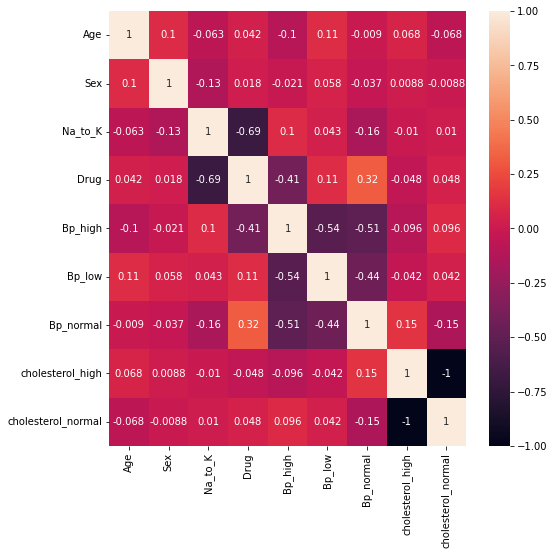

In [228]:
plt.figure(figsize=(8,8))
ax=sns.heatmap(df1.corr(),annot=True) #correlation

## Model Building

In [229]:
x=df1[['Age','Sex','Na_to_K','Bp_high','Bp_low','Bp_normal','cholesterol_high','cholesterol_normal']] #independent variable

In [230]:
x

,Age,Sex,Na_to_K,Bp_high,Bp_low,Bp_normal,cholesterol_high,cholesterol_normal
0,23,0,25.355,1,0,0,1,0
1,47,1,13.093,0,1,0,1,0
2,47,1,10.114,0,1,0,1,0
3,28,0,7.798,0,0,1,1,0
4,61,0,18.043,0,1,0,1,0
...,...,...,...,...,...,...,...,...
195,56,0,11.567,0,1,0,1,0
196,16,1,12.006,0,1,0,1,0
197,52,1,9.894,0,0,1,1,0
198,23,1,14.020,0,0,1,0,1


In [231]:
y=df1.Drug #target variable

In [232]:
y

0      0
1      3
2      3
3      4
4      0
      ..
195    3
196    3
197    4
198    4
199    4
Name: Drug, Length: 200, dtype: int32

In [233]:
#split data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [234]:
#balance data
from imblearn.over_sampling import SMOTE
sc=SMOTE()
x_smote,y_smote=sc.fit_resample(x_train,y_train)

In [235]:
y_train

114    4
173    0
5      4
126    0
117    4
      ..
106    4
14     4
92     0
179    0
102    3
Name: Drug, Length: 150, dtype: int32

In [236]:
from sklearn.tree import DecisionTreeClassifier #DDecisionTreeClassifier
DC=DecisionTreeClassifier()
model=DC.fit(x_smote,y_smote)

In [237]:
y_test_prob=DC.predict(x_test) #y_test_prob

In [238]:
from sklearn.metrics import classification_report,accuracy_score,f1_score
accuracy_score(y_test,y_test_prob)#accuracy_score

1.0

In [239]:
print(classification_report(y_test,y_test_prob)) #classification_report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        15

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [240]:
f1_score(y_test,y_test_prob,pos_label='positive',average='micro') #f1_score

1.0

## Hyper parameter

In [241]:
params={'criterion':('gini','entropy'),
    'splitter':('best','random'),
    'max_depth':list(range(1,30)),
    'min_samples_split':[2,3,4,5,6,7,8,9,10],
     'min_samples_leaf':list(range(1,11))

    
}

In [242]:
#GridSearchCV
from sklearn.model_selection import GridSearchCV
tree_dc=DecisionTreeClassifier(random_state=42)
GS=GridSearchCV(tree_dc,params,scoring='accuracy',
    n_jobs=-1,
    refit=True,
    cv=3,
    verbose=3)
GS.fit(x_smote,y_smote)

Fitting 3 folds for each of 10440 candidates, totalling 31320 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'splitter': ('best', 'random')},
             scoring='accuracy', verbose=3)

In [243]:
GS.best_estimator_ #best_estimator

DecisionTreeClassifier(max_depth=4, random_state=42)

In [244]:
GS.best_params_ #best_params

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [245]:
tree_best_dc=DecisionTreeClassifier(criterion= 'gini',
 max_depth= 1,
 min_samples_leaf= 1,
 min_samples_split= 2,
 splitter= 'best')
tree_best_dc.fit(x_smote,y_smote)


DecisionTreeClassifier(max_depth=1)

In [246]:
y_test_pred=tree_best_dc.predict(x_test) #y_test_pred

In [247]:
from sklearn.metrics import classification_report,accuracy_score
accuracy_score(y_test,y_test_pred)#accuracy_score

0.52

In [248]:
print(classification_report(y_test,y_test_pred))#classification_report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.20      1.00      0.33         6
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        15

    accuracy                           0.52        50
   macro avg       0.24      0.40      0.27        50
weighted avg       0.42      0.52      0.44        50



In [249]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
RC=RandomForestClassifier()
RC_model=RC.fit(x_smote,y_smote)

In [250]:
y_test_pred_rc=RC.predict(x_test)

In [251]:
accuracy_score(y_test,y_test_pred_rc) #accuracy_score

1.0

In [252]:
f1_score(y_test,y_test_pred_rc,pos_label='positive',average='micro') #f1_score

1.0

## Hyper parameter

In [253]:
n_estimators=[int(x) for x in np.linspace(start=200,stop=2000,num=10)]
n_estimators

[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]

In [254]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = list(range(1,11))
min_samples_leaf = list(range(1,11))
bootstrap = [True, False] 

    
params={
  'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap
     
}


In [255]:
RC1=RandomForestClassifier(random_state=42)

In [256]:
from sklearn.model_selection import RandomizedSearchCV
RS=RandomizedSearchCV(estimator=RC1, scoring='f1',param_distributions=params, n_iter=100, cv=3, 
                               verbose=3, random_state=42, n_jobs=-1)

RS.fit(x_smote,y_smote)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         

In [257]:
RS.best_estimator_

RandomForestClassifier(max_depth=80, max_features='sqrt', min_samples_leaf=8,
                       min_samples_split=10, n_estimators=1200,
                       random_state=42)

In [258]:
best_params=RS.best_params_ #best_params

In [259]:
model_RC=RandomForestClassifier(**best_params) #fit with best_params
model_RC.fit(x_smote,y_smote)

RandomForestClassifier(max_depth=80, max_features='sqrt', min_samples_leaf=8,
                       min_samples_split=10, n_estimators=1200)

In [260]:

y_text_bestpred_rf=model_RC.predict(x_test) #y_test_bestpred_rf

In [261]:
accuracy_score(y_test,y_text_bestpred_rf) #accuracy_score

1.0

In [262]:
print(classification_report(y_test,y_text_bestpred_rf)) #classification_report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        15

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [263]:
f1_score(y_test,y_text_bestpred_rf,pos_label='positive',average='micro') #f1_score

1.0

In [264]:
#XGBClassifier
from xgboost import XGBClassifier
XGB=XGBClassifier()
XGB.fit(x_smote,y_smote)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [265]:
y_test_xg_pred=XGB.predict(x_test) #y_test_xg_pred

In [266]:
accuracy_score(y_test,y_test_xg_pred) #accuracy_score

1.0

In [267]:
#Hyper parameter

In [268]:
params_xg={
    'gamma':[x for x in np.linspace(0,100,1000)],
    'max_depth':[int(x) for x in range(1,11)],

    'n_estimators':[int(x) for x in np.arange(1,200)],
    'learning_rate':[0.01,0.02,0.03,0.05,0.1,0.2,0.300000012,0.4,0.5]
}

In [269]:
XG=XGBClassifier(random_state=42)

In [270]:
#RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
Xg_RS=RandomizedSearchCV(estimator=XG, scoring='f1',param_distributions=params_xg, n_iter=100, cv=3, 
                               verbose=3, random_state=42, n_jobs=-1)

Xg_RS.fit(x_smote,y_smote)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                                  2.4024024024024024,
                                                  2.5025025025025025

In [271]:
Xg_RS.best_estimator_ #best_estimator

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=89.8898898898899, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=7, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=155, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=42,
              reg_alpha=0, ...)

In [272]:
best_params_xg=Xg_RS.best_params_ #best_params
best_params_xg

{'n_estimators': 155,
 'max_depth': 7,
 'learning_rate': 0.2,
 'gamma': 89.8898898898899}

In [278]:
xg_boost=XGBClassifier(best_params_xg)
xg_boost_best=xg_boost.fit(x_smote,y_smote) #fit

In [279]:
y_test_predict_xg_boost_best=xg_boost.predict(x_test) #y_test_predict_xg_boost_best

In [280]:
accuracy_score(y_test,y_test_predict_xg_boost_best) #accuracy_score

1.0

In [281]:
print(classification_report(y_test,y_test_predict_xg_boost_best)) #classification_report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        15

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

